#A real-estate startup has hired you- participants of the IPBA- to work on a pricing model for used houses.

#Objective
#To predict the Housing prices in Indore as a function of the different
#attributes of houses and locality

#Develop a pricing model that will make an estimate of the Price of the house. 
#This will help the company to reduce its cost and also streamline the process of selling used houses.


#CRIM: per capita crime rate
#ZN: the proportion of residential land zoned for lots larger than 25,000 sq.ft.
#INDUS: the proportion of non-retail business acres per town.
#RIVER_FLG: River Dummy Var (this is equal to 1 if tract bounds river; 0 otherwise)
#nitric oxides concentration: the nitric oxides concentration (parts per 10 million)
#rooms/dwelling: the average number of rooms per dwelling
#AGE: the proportion of owner-occupied units built prior to 1940
#DIS: the weighted distances to five employment centers of the town
#RAD: the index of accessibility to radial highways
#TAX: the full-value property-tax rate per INR 10 millions (1 crores)
#PTRATIO: the pupil-teacher ratio by area
#B: calculated as 1000(Bk - 0.63)², where Bk is the proportion of people living is slums in the area
#LSTAT: This is the percentage lower status and income of the population
#MEDV: This is the median value of owner-occupied homes in INR millions (10 lakhs)

#Participants should be able to :
#Clean the data
#perform EDA and Visualizations
#perform feature engineering
#build a model (linear regression)
#evaluate the model
#provide business insights from the model

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('IndoreHP_Train.csv')
test=pd.read_csv('IndoreHP_Test.csv')

In [3]:
train.head()

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.8380,4.8804,24.720
1,2,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.7450,9.4142,22.680
2,3,0.028109,0.0,6.9286,0,0.45962,7.40055,61.711,4.967100,2,242,17.8,396.7583,4.0703,36.435
3,4,0.033341,0.0,2.2454,0,0.44426,7.34790,45.342,6.001578,3,222,18.7,406.4689,2.9400,34.736
4,5,0.072502,0.0,2.1800,0,0.47632,7.14700,53.658,5.819712,3,222,18.7,388.9620,5.3833,38.010


In [4]:
test.head()

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,400,9.693915,0,18.824,0,0.63731,6.02952,100.000,1.204173,24,666,20.2,347.8425,10.0065
1,401,5.143131,0,18.462,0,0.63731,4.97000,100.000,1.305850,24,666,20.2,356.7440,3.0970
2,402,6.407985,0,17.557,1,0.63100,7.01600,93.600,1.178352,24,666,20.2,380.2885,3.0192
3,403,8.267250,0,18.462,1,0.67468,6.16875,93.184,1.107008,24,666,20.2,354.8376,9.3240
4,404,5.726680,0,17.919,1,0.66255,6.95032,96.800,1.329566,24,666,20.2,364.0701,3.5808


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           350 non-null    int64  
 1   CRIM                         350 non-null    float64
 2   ZN                           350 non-null    float64
 3   INDUS                        350 non-null    float64
 4   RIVER_FLG                    350 non-null    int64  
 5   nitric oxides concentration  350 non-null    float64
 6   #rooms/dwelling              350 non-null    float64
 7   AGE                          350 non-null    float64
 8   DIS                          350 non-null    float64
 9   RAD                          350 non-null    int64  
 10  TAX                          350 non-null    int64  
 11  PTRATIO                      350 non-null    float64
 12  B                            350 non-null    float64
 13  LSTAT               

In [6]:
train['RIVER_FLG'].head()

0    0
1    0
2    0
3    0
4    0
Name: RIVER_FLG, dtype: int64

In [7]:
train['RAD'].shape

(350,)

In [8]:
print(train['RIVER_FLG'].unique().tolist())

[0, 1]


In [9]:
print(train['RAD'].unique().tolist())

[1, 2, 3, 5, 4, 8, 6, 7]


In [10]:
train.isnull().sum()

ID                             0
CRIM                           0
ZN                             0
INDUS                          0
RIVER_FLG                      0
nitric oxides concentration    0
#rooms/dwelling                0
AGE                            0
DIS                            0
RAD                            0
TAX                            0
PTRATIO                        0
B                              0
LSTAT                          0
MEDV                           0
dtype: int64

In [11]:
train.describe()

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,0.404963,15.257143,8.436498,0.077143,0.510684,6.396922,60.867446,4.402082,4.482857,310.274286,17.702000,379.876775,10.421892,25.129723
std,101.180532,0.651082,25.607566,6.044201,0.267200,0.103476,0.719591,28.566625,1.971886,1.607109,67.661548,2.198807,41.982531,5.915906,8.617897
min,1.000000,0.006130,0.000000,0.450800,0.000000,0.374300,4.728960,2.871000,1.255520,1.000000,188.000000,12.600000,69.384000,1.799200,12.319000
25%,88.250000,0.058786,0.000000,4.019625,0.000000,0.441527,5.931550,35.149500,2.723105,4.000000,264.000000,16.100000,375.525275,6.109200,19.692750
50%,175.500000,0.132758,0.000000,6.448000,0.000000,0.489425,6.276270,62.019500,4.108295,4.000000,304.000000,17.900000,387.009300,9.393150,22.728500
75%,262.750000,0.411469,22.000000,10.263600,0.000000,0.542917,6.746752,88.151000,5.750662,5.000000,358.000000,19.100000,400.156950,13.245100,28.523250
max,350.000000,4.261296,100.000000,26.676000,1.000000,0.914550,8.986750,105.000000,9.555104,8.000000,469.000000,21.200000,416.745000,33.033600,52.500000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

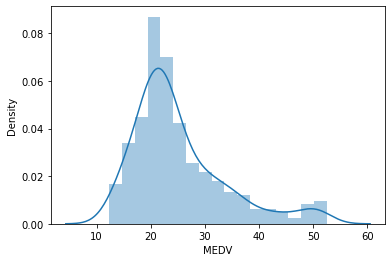

In [13]:
sns.distplot(train['MEDV'])

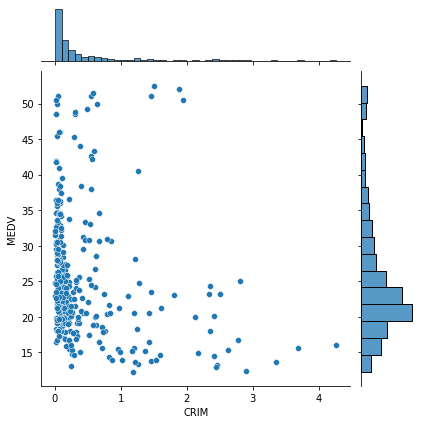

In [14]:
sns.jointplot(x='CRIM',y='MEDV',data=train,kind='scatter')

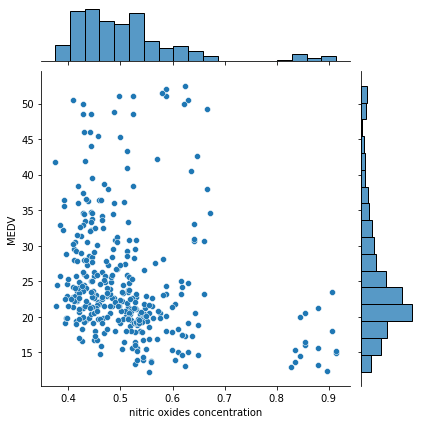

In [15]:
sns.jointplot(x='nitric oxides concentration',y='MEDV',data=train,kind='scatter')

<AxesSubplot:>

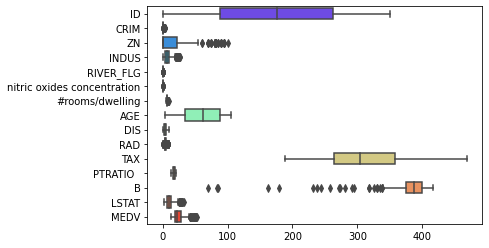

In [16]:
sns.boxplot(data=train,palette='rainbow',orient='h')

<AxesSubplot:>

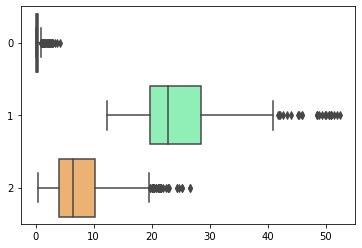

In [17]:
sns.boxplot(data=(train['CRIM'],train['MEDV'],train['INDUS']),palette='rainbow',orient='h')

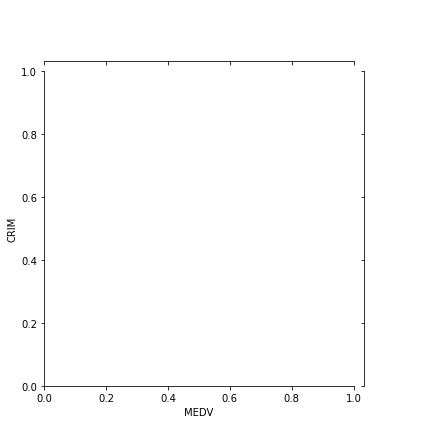

In [18]:
g = sns.JointGrid(x="MEDV", y="CRIM", data=train)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajes\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


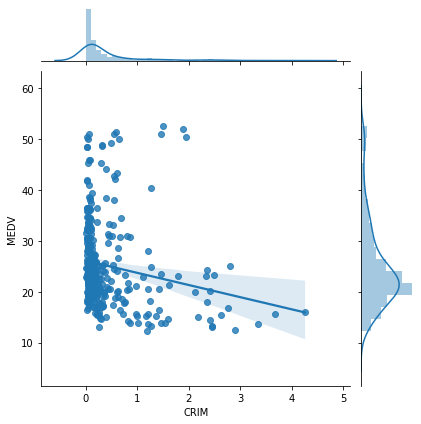

In [19]:
g = sns.JointGrid(x="CRIM", y="MEDV", data=train)
g = g.plot(sns.regplot, sns.distplot)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


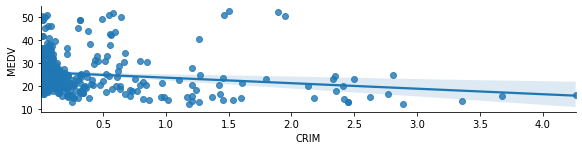

In [20]:
sns.lmplot(x='CRIM',y='MEDV',size=2,aspect=4,data=train)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


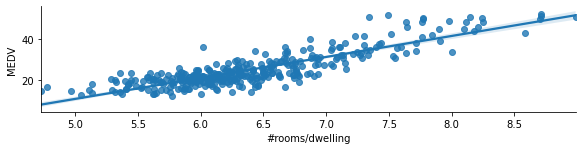

In [21]:
sns.lmplot(x='#rooms/dwelling',y='MEDV',size=2,aspect=4,data=train)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


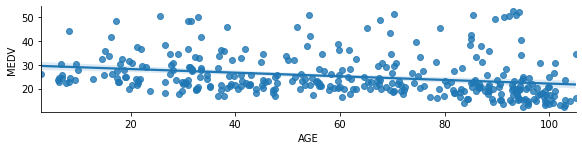

In [22]:
sns.lmplot(x='AGE',y='MEDV',size=2,aspect=4,data=train)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


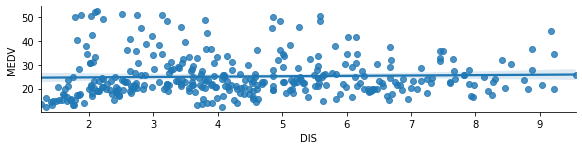

In [23]:
sns.lmplot(x='DIS',y='MEDV',size=2,aspect=4,data=train)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


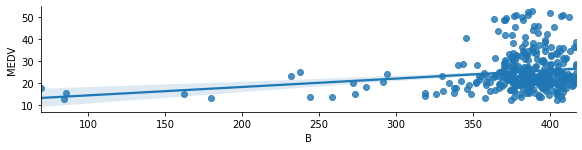

In [24]:
#PTRATIO
sns.lmplot(x='B',y='MEDV',size=2,aspect=4,data=train)

C:\Users\rajes\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


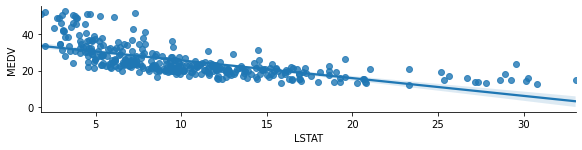

In [25]:
sns.lmplot(x='LSTAT',y='MEDV',size=2,aspect=4,data=train)

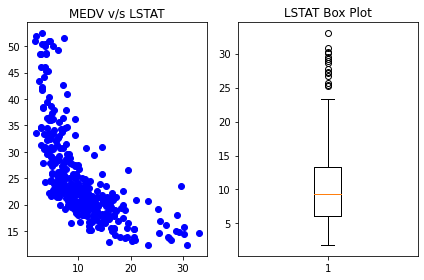

In [22]:
plt.subplot(1, 2, 1) 

plt.scatter(train['LSTAT'], train['MEDV'], color='b')
plt.title('MEDV v/s LSTAT')
plt.subplot(1, 2, 2)

plt.boxplot(train['LSTAT'])
plt.title('LSTAT Box Plot')

plt.tight_layout()
plt.show()

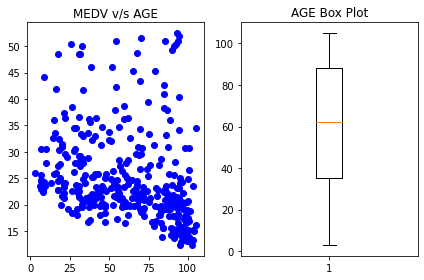

In [26]:
plt.subplot(1, 2, 1) 

plt.scatter(train['AGE'], train['MEDV'], color='b')
plt.title('MEDV v/s AGE')
plt.subplot(1, 2, 2)

plt.boxplot(train['AGE'])
plt.title('AGE Box Plot')

plt.tight_layout()
plt.show()

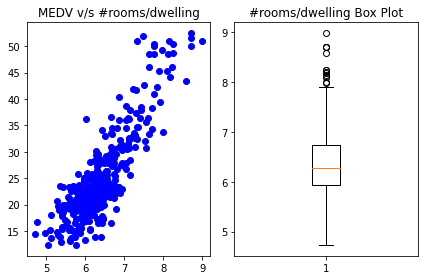

In [27]:
plt.subplot(1, 2, 1) 

plt.scatter(train['#rooms/dwelling'], train['MEDV'], color='b')
plt.title('MEDV v/s #rooms/dwelling')
plt.subplot(1, 2, 2)

plt.boxplot(train['#rooms/dwelling'])
plt.title('#rooms/dwelling Box Plot')

plt.tight_layout()
plt.show()

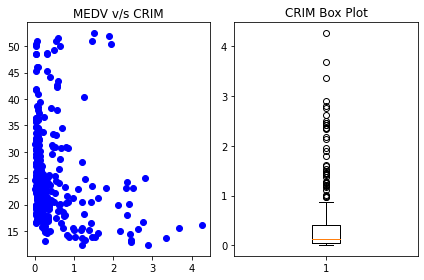

In [28]:
plt.subplot(1, 2, 1) 

plt.scatter(train['CRIM'], train['MEDV'], color='b')
plt.title('MEDV v/s CRIM')
plt.subplot(1, 2, 2)

plt.boxplot(train['CRIM'])
plt.title('CRIM Box Plot')

plt.tight_layout()
plt.show()

#Outliers - Identify and Impute ALL Columns

In [5]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes in ['float64','int64'] and feature !='ID' and feature !='MEDV' and feature !='AGE' and feature !='DIS' and feature !='RAD' and feature !='TAX' and feature !='PTRATIO' and feature !='LSTAT']
numerical_features

['CRIM',
 'ZN',
 'INDUS',
 'RIVER_FLG',
 'nitric oxides concentration',
 '#rooms/dwelling',
 'PTRATIO  ',
 'B']

In [6]:
for feat in numerical_features:
    Q1 = train[feat].quantile(0.25)
    Q3 = train[feat].quantile(0.75)

    IQR = Q3 - Q1

    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    train[feat] = train[feat].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)
    train[feat] = train[feat].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)

<AxesSubplot:>

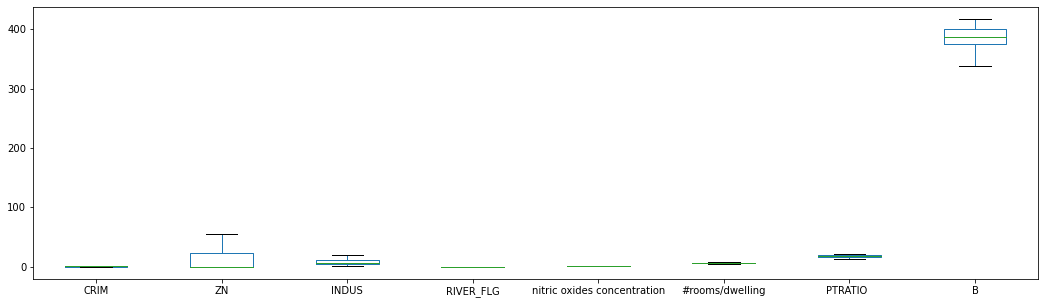

In [7]:
train[['CRIM',
 'ZN',
 'INDUS',
 'RIVER_FLG',
 'nitric oxides concentration',
 '#rooms/dwelling',
 'PTRATIO  ',
 'B']].plot.box(figsize=(18,5))

In [8]:
numerical_features = [feature for feature in test.columns if test[feature].dtypes in ['float64','int64'] and feature !='ID' and feature !='AGE' and feature !='DIS' and feature !='RAD' and feature !='TAX' and feature !='PTRATIO' and feature !='LSTAT']
numerical_features

['CRIM',
 'ZN',
 'INDUS',
 'RIVER_FLG',
 'nitric oxides concentration',
 '#rooms/dwelling',
 'PTRATIO  ',
 'B']

In [9]:
for feat in numerical_features:
    Q1 = test[feat].quantile(0.25)
    Q3 = test[feat].quantile(0.75)

    IQR = Q3 - Q1

    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    test[feat] = test[feat].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)
    test[feat] = test[feat].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)

<AxesSubplot:>

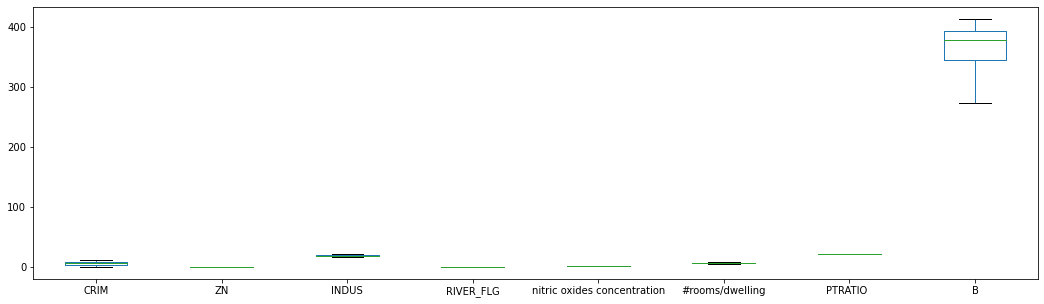

In [10]:
test[['CRIM',
 'ZN',
 'INDUS',
 'RIVER_FLG',
 'nitric oxides concentration',
 '#rooms/dwelling',
 'PTRATIO  ',
 'B']].plot.box(figsize=(18,5))

#Divide Data into X and y

In [11]:
y_train = train['MEDV']

X_train = train.drop(['ID', 'MEDV'], axis = 1)

In [12]:
X_train.head()

,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006130,18.0,2.3562,0.0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.8380,4.8804
1,0.027037,0.0,6.8579,0.0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.7450,9.4142
2,0.028109,0.0,6.9286,0.0,0.45962,7.40055,61.711,4.967100,2,242,17.8,396.7583,4.0703
3,0.033341,0.0,2.2454,0.0,0.44426,7.34790,45.342,6.001578,3,222,18.7,406.4689,2.9400
4,0.072502,0.0,2.1800,0.0,0.47632,7.14700,53.658,5.819712,3,222,18.7,388.9620,5.3833


In [13]:
X_test = test.drop(['ID'], axis = 1)

In [14]:
X_test.head()

,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.693915,0.0,18.824,0.0,0.63731,6.02952,100.000,1.204173,24,666,20.2,347.8425,10.0065
1,5.143131,0.0,18.462,0.0,0.63731,4.97000,100.000,1.305850,24,666,20.2,356.7440,3.0970
2,6.407985,0.0,17.557,0.0,0.63100,7.01600,93.600,1.178352,24,666,20.2,380.2885,3.0192
3,8.267250,0.0,18.462,0.0,0.67468,6.16875,93.184,1.107008,24,666,20.2,354.8376,9.3240
4,5.726680,0.0,17.919,0.0,0.66255,6.95032,96.800,1.329566,24,666,20.2,364.0701,3.5808


In [59]:
#y_test.head()

NameError: name 'y_test' is not defined

#Build the model

In [15]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [16]:
clf = LinearRegression(normalize=True)
#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)
#print(r2_score(y_test,y_pred))

In [17]:
clf.fit(X_train,y_train)

LinearRegression(normalize=True)

In [18]:
train_predict = clf.predict(X_train)
train_predict

array([26.32964501, 26.90136316, 34.55807484, 34.03523474, 31.10127248,
       23.31280378, 21.59982284, 20.49814158, 11.52321537, 16.51158257,
       19.08220147, 17.42991121, 21.72557423, 21.02348253, 17.82992103,
       21.09654581, 21.03547764, 20.67908208, 17.5835248 , 15.64587915,
       14.18971842, 21.23901513, 18.02109091, 15.64881699, 14.40857736,
       11.03899466, 15.38606698, 16.26544937, 21.94427168, 25.89645227,
       14.8292953 , 19.76637688, 18.20581596, 15.04868989, 20.18658079,
       19.09303561, 18.92727457, 21.63629246, 21.25555527, 27.52377843,
       30.49163122, 29.62336694, 27.0224705 , 26.5563939 , 24.51927015,
       18.68739645, 19.90769541, 22.07733562, 10.66415917, 14.27992388,
       21.4193027 , 22.34638653, 26.33184942, 23.82698119, 15.01399272,
       32.13803866, 24.01476882, 31.47231904, 20.3785302 , 19.51140468,
       17.75512167, 15.60227606, 23.72211079, 23.17387288, 29.71768568,
       24.90418986, 23.03997131, 17.31614575, 14.69831704, 16.75

In [19]:
test_predict = clf.predict(X_test)
test_predict

array([46.15051271, 24.91814052, 46.93745746, 43.25614755, 43.28319284,
       35.84948709, 21.75510311, 19.41350774, 19.66982502, 21.92848343,
       44.0065317 , 19.36758392, 35.23894451, 33.78703832, 29.72993583,
       29.98389478, 31.22672063, 25.57641315, 30.64342527, 23.54668994,
       41.03023426, 27.74561865, 15.52943213, 28.97160166, 23.37255103,
       18.95423384, 20.64519228, 41.54994165, 44.57456687, 30.52143951,
       17.04229096, 34.61905143, 37.45253604, 33.96337325, 37.11477638,
       35.21925492, 29.65082304, 11.45456509, 23.58916374, 22.0558752 ,
       11.67917081, 13.04272203, 33.83795527, 33.80321527, 29.65609835,
       24.38420162, 22.98528062, 52.64746997, 36.71922763, 14.00888731,
       12.78813985, 27.22859118, 33.60529417, 30.56716384, 40.81007212,
       15.60049248, 49.03065792, 32.38204315, 16.10831253, 28.07261838,
       17.77365087, 40.8435412 , 34.47806514, 32.54770398, 46.96939235,
        6.01046036, 35.83641951, 37.14110406, 41.13449162, 32.77

In [20]:
print(r2_score(y_train,train_predict))

0.812308778674881


In [71]:
#import numpy as np

#n = 350
#alpha = 0.0001

#a_0 = np.zeros((n,1))
#a_1 = np.zeros((n,1))

#epochs = 0
#while(epochs < 1000):
    #y = a_0 + a_1 * X_train
    #error = y - y_train
    #mean_sq_er = np.sum(error**2)
    #mean_sq_er = mean_sq_er/n
    #a_0 = a_0 - alpha * 2 * np.sum(error)/n 
    #a_1 = a_1 - alpha * 2 * np.sum(error * X_train)/n
    #epochs += 1
    #if(epochs%10 == 0):
        print(mean_sq_er)

ValueError: Length of passed values is 350, index implies 363.

In [65]:
#import matplotlib.pyplot as plt 

#train_prediction = a_0 + a_1 * X_train
#print('R2 Score:',r2_score(y_train,train_predict))

#y_plot = []
#for i in range(100):
   # y_plot.append(a_0 + a_1 * i)
#plt.figure(figsize=(10,10))
#plt.scatter(x_train,y_train,color='red',label='GT')
#plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
#plt.legend()
#plt.show()

NameError: name 'a_0' is not defined

In [ ]:
#import matplotlib.pyplot as plt 

#y_prediction = a_0 + a_1 * x_test
#print('R2 Score:',r2_score(y_test,y_prediction))

#y_plot = []
#for i in range(100):
    y_plot.append(a_0 + a_1 * i)
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()

In [72]:
mean_squared_error(train_predict, y_train, squared = False)

NameError: name 'mean_squared_error' is not defined